## "Netelastic regression"
"Netelastic regression" is likely a misspelling of elastic net regression, a statistical regularization method that combines the penalties of both lasso and ridge regression. This hybrid approach is widely used to prevent overfitting and improve model performance, especially with highly correlated variables or high-dimensional data. 

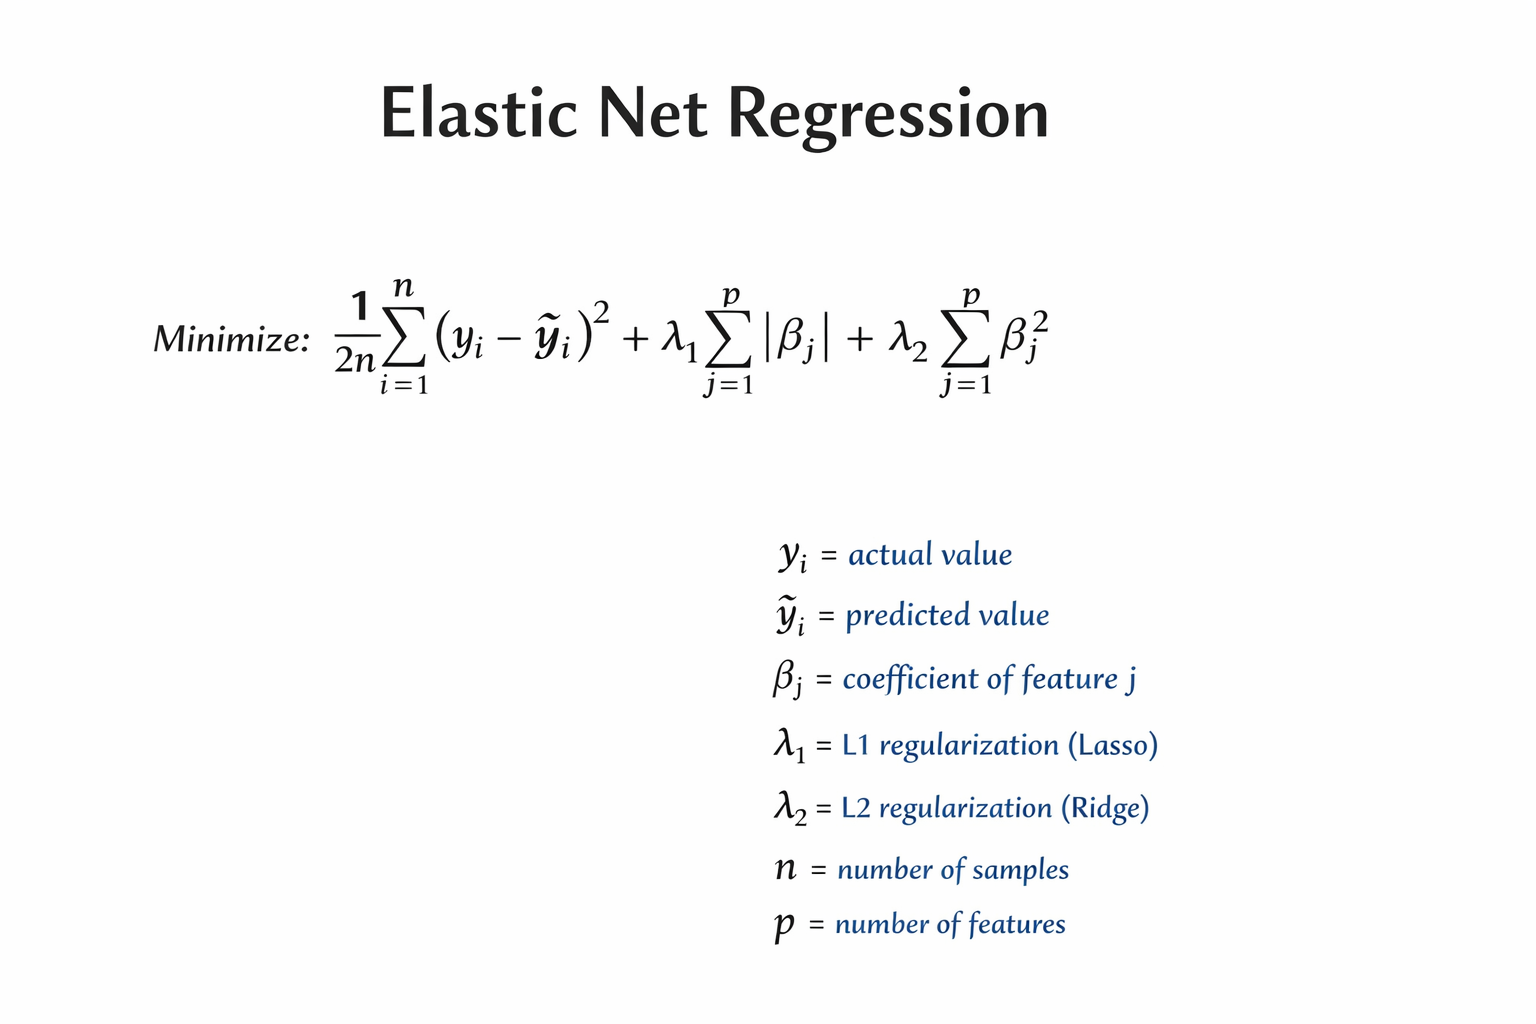
## Key Features of Elastic Net Regression
## Hybrid Regularization: 
Elastic net incorporates both L1 (lasso) and L2 (ridge) penalty terms into its objective function.
## Variable Selection:
The L1 penalty encourages sparsity by shrinking some coefficients to exactly zero, effectively performing automatic variable selection.
## Coefficient Shrinkage:
The L2 penalty shrinks all coefficients towards zero, which helps in handling multicollinearity (highly correlated predictors) and provides more stable estimates.
## Grouping Effect:
A key advantage of the elastic net is its ability to select or exclude groups of highly correlated variables together, rather than picking just one from the group randomly, which is a limitation of lasso regression. 
# How It Works
The behavior of the elastic net model is controlled by two main hyperparameters, which are typically tuned using cross-validation: 
alpha (or l1_ratio): Controls the mixing balance between the L1 and L2 penalties.

alpha = 1 (or l1_ratio = 1) makes the model behave like lasso regression.
 
alpha = 0 (or l1_ratio = 0) makes the model behave like ridge regression (in scikit-learn implementations,
l1_ratio between 0 and 1 is used with an overall alpha for strength).
Values between 0 and 1 combine both penalties.
lambda (or overall alpha in some libraries): Controls the overall strength of the regularization. 

In [1]:
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = ElasticNet(alpha=1.0, l1_ratio=0.5) ## L1==L2
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R2 Score:", r2)


MSE: 406.87334052717836
R2 Score: 0.5441007050973075


## ElasticNetCV 

In [1]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [2]:
# ElasticNetCV model
elastic_cv = ElasticNetCV(
    l1_ratio=[0.1, 0.5, 0.7, 0.9, 1.0], 
    alphas=[0.1, 1.0, 10.0],             
    cv=5,                               
    random_state=42
)
elastic_cv.fit(X_train, y_train)

,l1_ratio,"[0.1, 0.5, ...]"
,eps,0.001
,n_alphas,'deprecated'
,alphas,"[0.1, 1.0, ...]"
,fit_intercept,True
,precompute,'auto'
,max_iter,1000
,tol,0.0001
,cv,5
,copy_X,True
,verbose,0


In [3]:
print("Best alpha:", elastic_cv.alpha_)
print("Best l1_ratio:", elastic_cv.l1_ratio_)

Best alpha: 0.1
Best l1_ratio: 0.1


In [4]:
y_pred = elastic_cv.predict(X_test)
score = r2_score(y_test, y_pred)
print("R^2 score:", score)

R^2 score: 0.4600100965892058


# Model Train Using ElasticNet Values Alpha and l1_ratio

In [8]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet(alpha=0.1, l1_ratio=0.1, random_state=42)
elastic.fit(X_train, y_train)

,alpha,0.1
,l1_ratio,0.1
,fit_intercept,True
,precompute,False
,max_iter,1000
,copy_X,True
,tol,0.0001
,warm_start,False
,positive,False
,random_state,42
,selection,'cyclic'


In [9]:
y_pred = elastic.predict(X_test)
score = r2_score(y_test, y_pred)
print("R^2 score:", score)


R^2 score: 0.4600100965892058
